# Task Level (Intermediate):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Load the dataset
df = pd.read_csv('delhiaqi.csv')

In [13]:
# Preprocessing
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.date

In [14]:
# 1. Descriptive Statistics
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
stats = df[pollutants].describe()

In [15]:
# 2. Correlation Analysis
corr_matrix = df[pollutants].corr()

In [16]:
# 3. Diurnal (Hourly) Trends
hourly_avg = df.groupby('hour')[pollutants].mean()

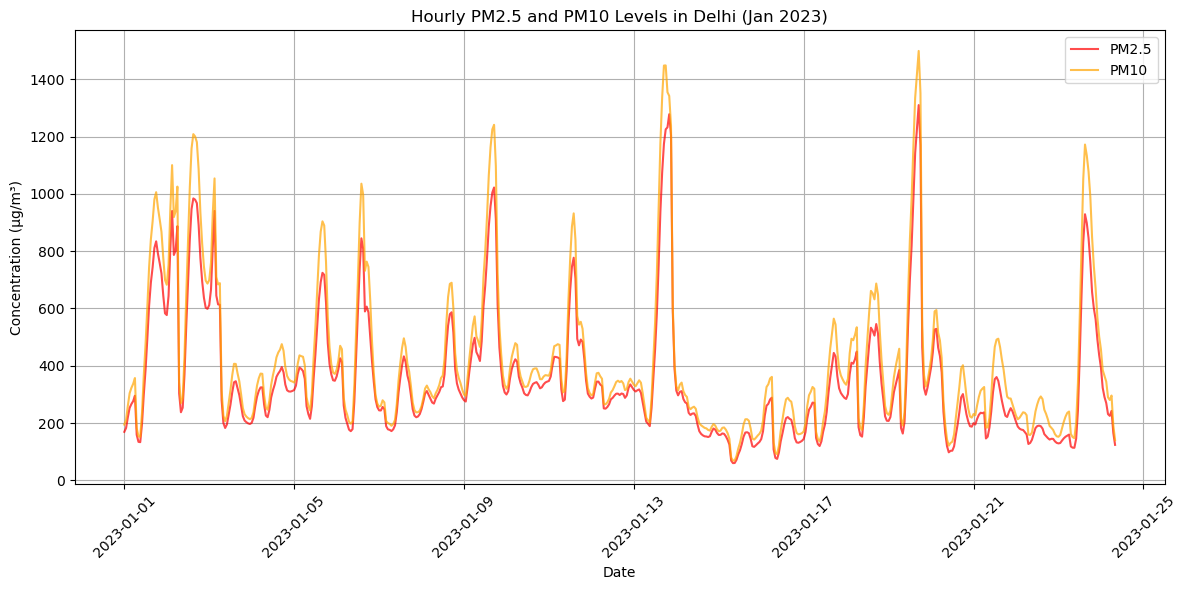

In [33]:
# Visualizations

# V1: Time Series of PM2.5 and PM10
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['pm2_5'], label='PM2.5', color='red', alpha=0.7)
plt.plot(df['date'], df['pm10'], label='PM10', color='orange', alpha=0.7)
plt.title('Hourly PM2.5 and PM10 Levels in Delhi (Jan 2023)')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

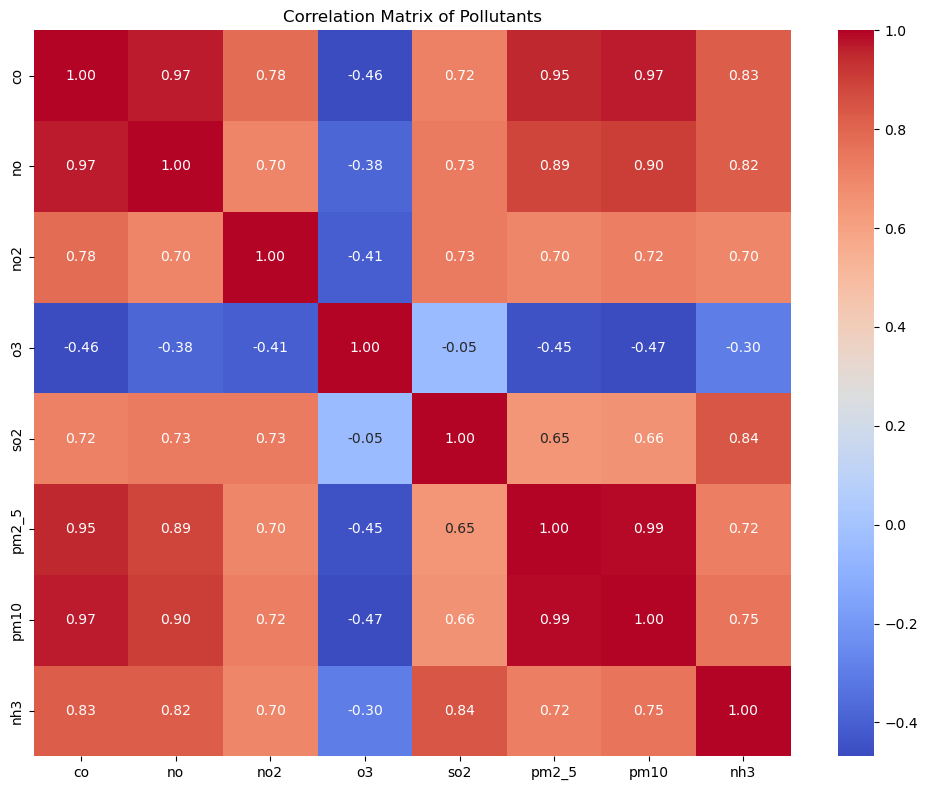

In [32]:
# V2: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

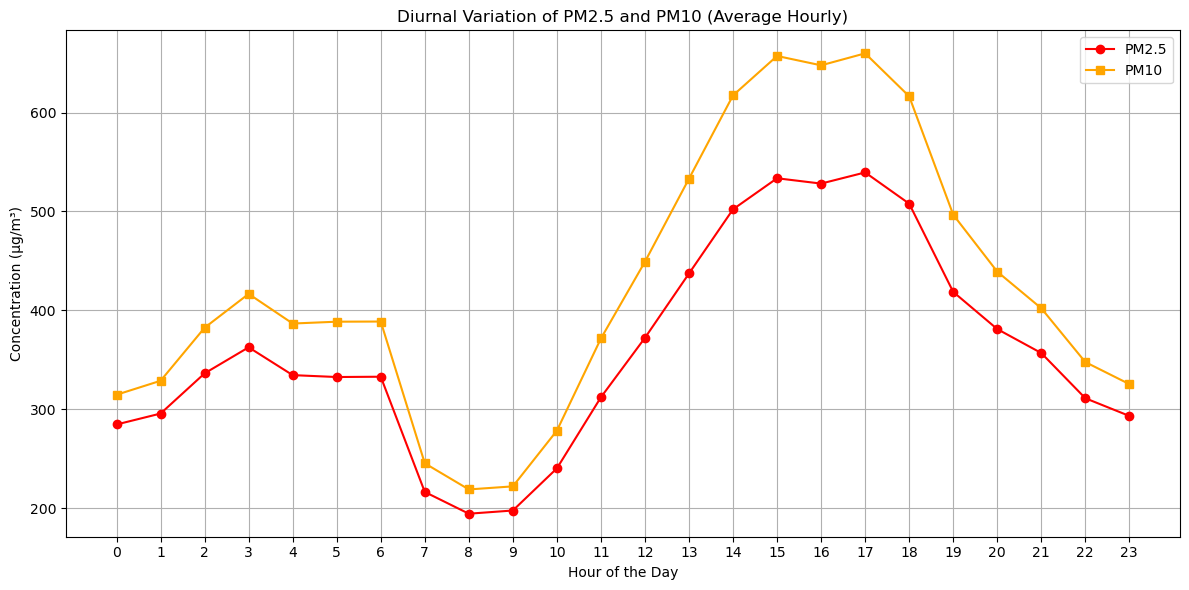

In [31]:
# V3: Diurnal Cycle (Hourly Average)
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['pm2_5'], marker='o', label='PM2.5', color='red')
plt.plot(hourly_avg.index, hourly_avg['pm10'], marker='s', label='PM10', color='orange')
plt.title('Diurnal Variation of PM2.5 and PM10 (Average Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Concentration (µg/m³)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

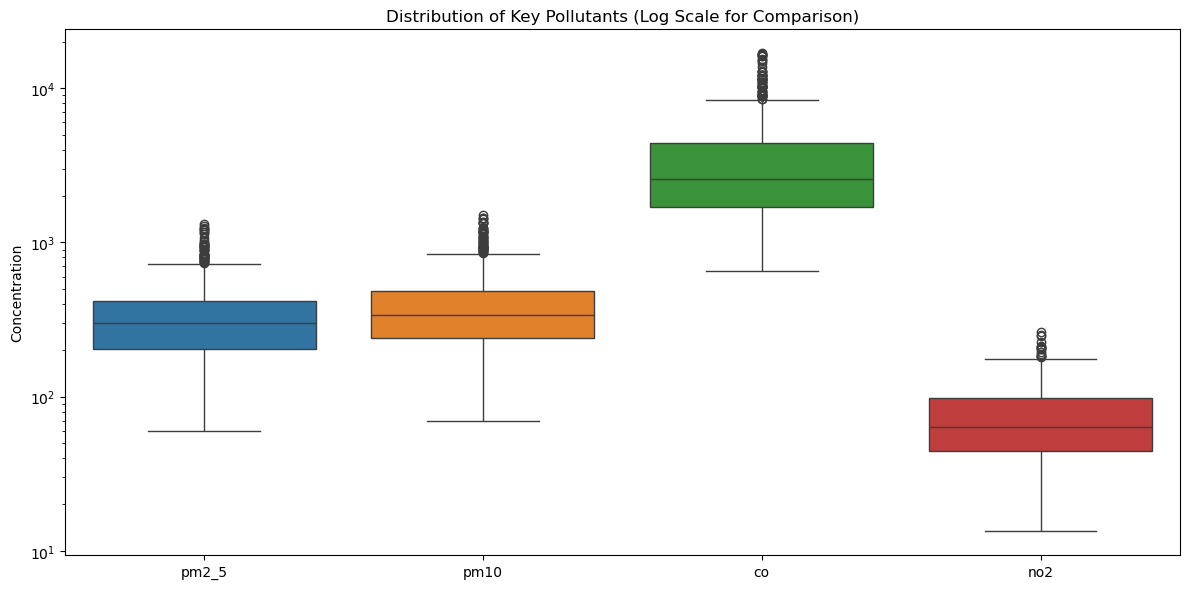

In [30]:
# V4: Distribution of Pollutants (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['pm2_5', 'pm10', 'co', 'no2']])
plt.yscale('log') # CO is much higher, so using log scale for comparison
plt.title('Distribution of Key Pollutants (Log Scale for Comparison)')
plt.ylabel('Concentration')
plt.tight_layout()
plt.show()

In [21]:
print("Stats Summary:")
print(stats)
print("\nHourly Average (First 5 hours):")
print(hourly_avg.head())

Stats Summary:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.650000   48